In [36]:
install.packages("ggcorrplot")
install.packages("car")
install.packages("HH")
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(ggcorrplot)
library(car)
library(HH)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [37]:
# Reading the dataset
data_rent <- read.csv("./main_rent_merge_2018ith_idh_wo_duplicates_2024_05_05_out.csv", dec = ",", header = TRUE, sep = ";")

In [38]:
# Convert categorical variables to factors (dummy variables)
data_rent$gym <- as.factor(data_rent$gym)
data_rent$field_quadra <- as.factor(data_rent$field_quadra)
data_rent$elevator <- as.factor(data_rent$elevator)
data_rent$furnished <- as.factor(data_rent$furnished)
data_rent$swimming_pool <- as.factor(data_rent$swimming_pool)
# Convert date to date format
data_rent$date <- as.Date(data_rent$date, format = "%d/%m/%Y")

In [39]:
# filter data by year
data_2018 <- filter(data_rent, year(date) == 2018)
data_2019 <- filter(data_rent, year(date) == 2019)
data_2020 <- filter(data_rent, year(date) == 2020)
data_2021 <- filter(data_rent, year(date) == 2021)
data_2022 <- filter(data_rent, year(date) == 2022)
data_2023 <- filter(data_rent, year(date) == 2023)

In [40]:
# defining the model parameters
params <- (price_m2 ~ area_m2 +
  suite +
  bathrooms +
  garage +
  condo_real +
  metro_dist_km +
  delta_cbd_farialima +
  idh +
  gym +
  field_quadra +
  elevator +
  furnished +
  swimming_pool)

In [41]:
# create linear regression models for each year
reg <- lm(params, data = data_rent)
reg_2018 <- lm(params, data = data_2018)
reg_2019 <- lm(params, data = data_2019)
reg_2020 <- lm(params, data = data_2020)
reg_2021 <- lm(params, data = data_2021)
reg_2022 <- lm(params, data = data_2022)
reg_2023 <- lm(params, data = data_2023)

In [42]:
reg_final <- reg
data_rent_final <- data_rent
print(nrow(data_rent_final))

[1] 18135


In [43]:
summary(reg_final)


Call:
lm(formula = params, data = data_rent)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.978 -13.009  -3.743   9.403 238.065 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -3.9254038  3.5183172  -1.116   0.2646    
area_m2             -0.2396407  0.0079879 -30.001  < 2e-16 ***
suite                4.1335997  0.5151047   8.025 1.12e-15 ***
bathrooms            0.6983209  0.3762275   1.856   0.0635 .  
garage               5.7304403  0.3792944  15.108  < 2e-16 ***
condo_real          -0.0058084  0.0004699 -12.361  < 2e-16 ***
metro_dist_km       -0.2559211  0.1602115  -1.597   0.1102    
delta_cbd_farialima -1.4624301  0.0687461 -21.273  < 2e-16 ***
idh                 83.6616234  3.8048891  21.988  < 2e-16 ***
gym1                 7.7438807  1.0442236   7.416 1.30e-13 ***
field_quadra1       -4.2770898  0.9176808  -4.661 3.19e-06 ***
elevator1           -4.9053625  0.7448231  -6.586 4.73e-11 ***
furnished1           9.381

In [44]:
outliers <- outlierTest(reg_final, cutoff = 100, n.max = Inf)
print(outliers)
# Get the row numbers of the outliers
outlier_rows <- as.numeric(names(outliers$rstudent))
print(length(outlier_rows))

       rstudent unadjusted p-value Bonferroni p
12890 11.954845         9.8835e-33   1.0615e-28
12891 11.954845         9.8835e-33   1.0615e-28
12615 10.871112         2.1984e-27   2.3611e-23
13241  8.593473         9.6089e-18   1.0320e-13
9188   8.522448         1.7715e-17   1.9026e-13
13242  7.964087         1.8328e-15   1.9684e-11
13240  7.799988         6.7660e-15   7.2667e-11
11533  7.198324         6.5036e-13   6.9849e-09
4130   7.140795         9.8804e-13   1.0612e-08
13238  7.007867         2.5651e-12   2.7549e-08
13239  6.411600         1.5005e-10   1.6116e-06
13237  6.408697         1.5293e-10   1.6424e-06
17016  6.257270         4.0673e-10   4.3682e-06
9283   6.195093         6.0387e-10   6.4856e-06
12453  5.954493         2.6906e-09   2.8897e-05
10614  5.946619         2.8227e-09   3.0316e-05
14150  5.667916         1.4828e-08   1.5925e-04
13236  5.648973         1.6552e-08   1.7777e-04
3266   5.505652         3.7628e-08   4.0412e-04
3366   5.410220         6.4301e-08   6.9

In [45]:
# print the outliers rows
print(data_rent_final[outlier_rows, c("price_m2","price_real_month","area_m2", "delta_cbd_farialima", "delta_cbd_paulista", "metro_dist_km")])
summary(data_rent_final$price_m2)
summary(data_rent_final$delta_cbd_farialima)

       price_m2 price_real_month area_m2 delta_cbd_farialima delta_cbd_paulista
12890 311.11111            14000      45           0.2667792          4.0776574
12891 311.11111            14000      45           0.2667792          4.0776574
12615 277.77778            10000      36           4.1464796          2.8882722
13241 236.84211             4500      19           3.5054748          2.5457264
9188  238.09524            10000      42           0.4791439          4.5122008
13242 236.84211             4500      19           3.5054748          2.5457264
13240 221.05263             4200      19           3.5054748          2.5457264
11533 209.09091            13800      66           3.4994331          1.1591651
4130  218.82143             6127      28           0.8634884          3.8167667
13238 205.26316             3900      19           3.5054748          2.5457264
13239 205.26316             3900      19           3.5054748          2.5457264
13237 205.26316             3900      19

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   28.64   40.82   45.42   56.76  311.11 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0716  3.0942  4.4998  5.4108  6.6763 32.6750 

In [46]:
# Remove the outlier rows from the dataframe
data_rent_wo_outliers <- data_rent_final[-outlier_rows,]
print(nrow(data_rent_final))
print(nrow(data_rent_wo_outliers))
reg_wo_outliers <- lm(params, data = data_rent_wo_outliers)
summary(reg_wo_outliers)

[1] 18135
[1] 17930



Call:
lm(formula = params, data = data_rent_wo_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.893 -11.821  -2.975   9.406  54.945 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.0110406  2.9246825   0.688   0.4917    
area_m2             -0.2397566  0.0067925 -35.297  < 2e-16 ***
suite                4.6456743  0.4307518  10.785  < 2e-16 ***
bathrooms            0.6483094  0.3162288   2.050   0.0404 *  
garage               6.2072063  0.3172408  19.566  < 2e-16 ***
condo_real          -0.0065642  0.0004014 -16.351  < 2e-16 ***
metro_dist_km       -0.5941462  0.1332961  -4.457 8.38e-06 ***
delta_cbd_farialima -1.2827268  0.0571454 -22.447  < 2e-16 ***
idh                 73.6799029  3.1655724  23.275  < 2e-16 ***
gym1                 7.6725580  0.8711836   8.807  < 2e-16 ***
field_quadra1       -4.5302460  0.7643604  -5.927 3.19e-09 ***
elevator1           -3.3813200  0.6200141  -5.454 5.05e-08 ***
furnished1    

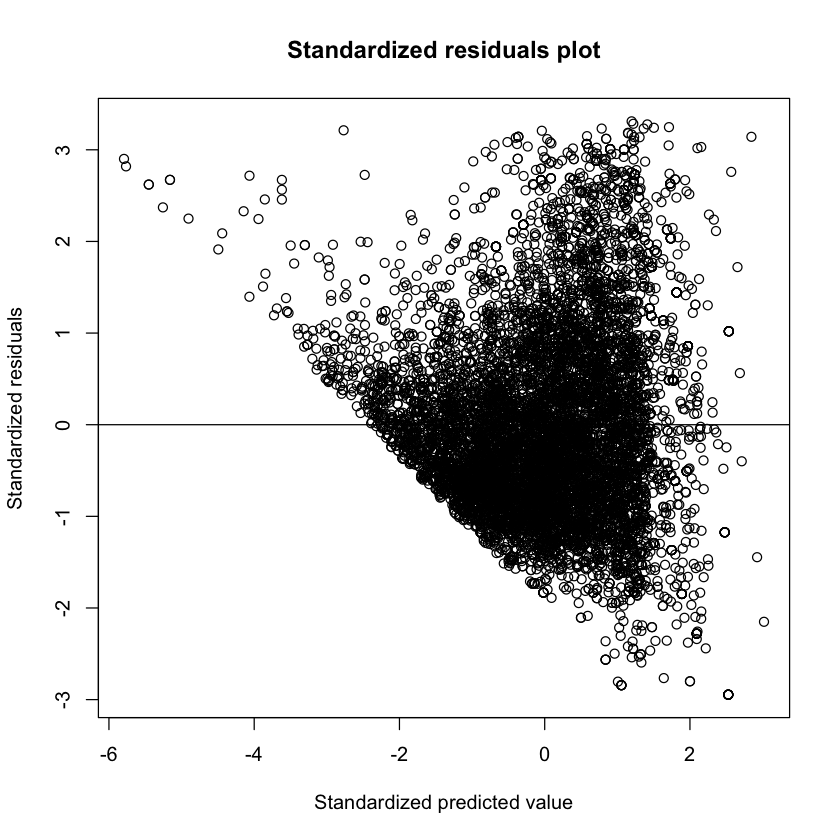

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 721.8892, Df = 1, p = < 2.22e-16

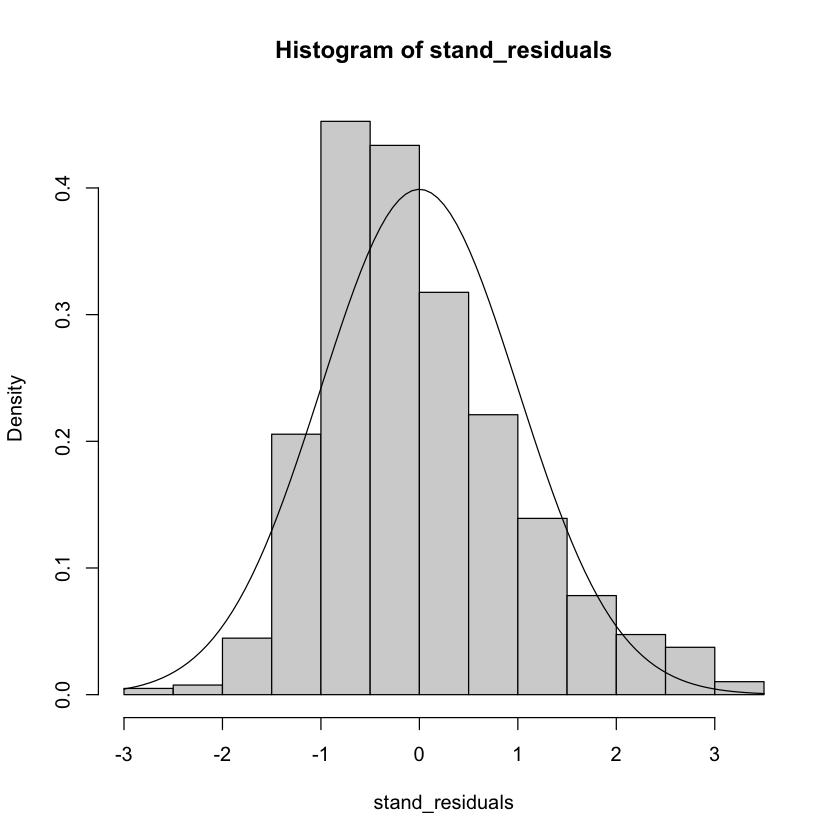

In [47]:
predicted<- predict(reg_wo_outliers)
residuals <- resid(reg_wo_outliers)
stand_predicted <- (predicted - mean(predicted)) / sd(predicted)
stand_residuals <- (residuals - mean(residuals)) / sd(residuals)

plot(stand_predicted, stand_residuals, main = "Standardized residuals plot", xlab = "Standardized predicted value", ylab = "Standardized residuals")
abline(0, 0)

hist(stand_residuals, freq = FALSE)
curve(dnorm, add = TRUE)

ncvTest(reg_wo_outliers)

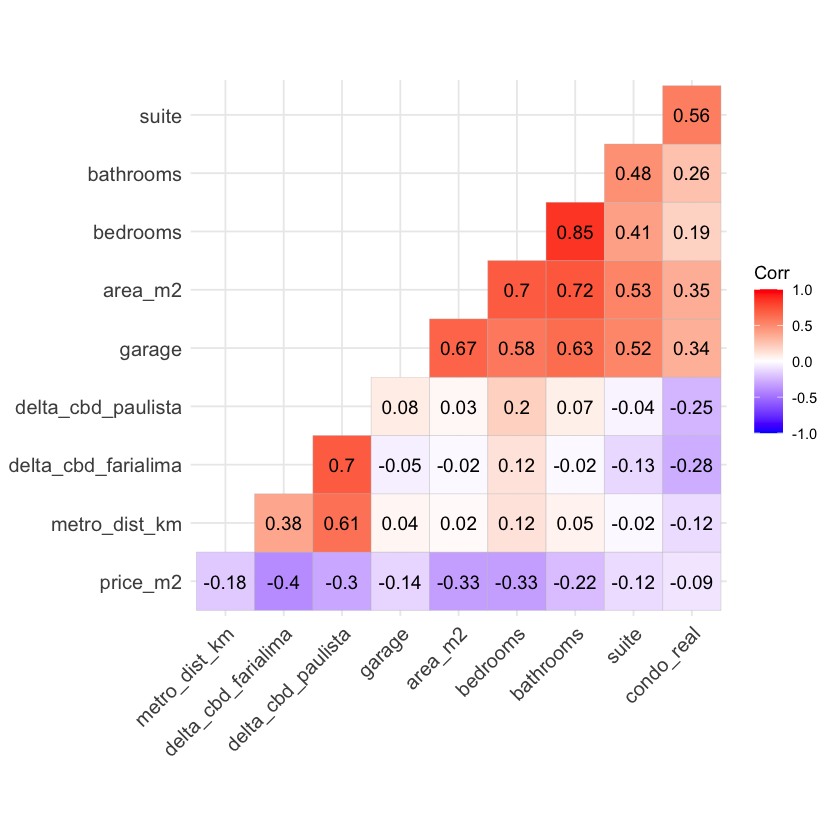

In [48]:
reduced_data <- data_rent_wo_outliers[, (names(data_rent_wo_outliers) %in% c("price_m2", "area_m2", "bedrooms", "suite", "bathrooms", "garage", "condo_real", "metro_dist_km", "delta_cbd_farialima", "delta_cbd_paulista"))]

# Compute correlation at 2 decimal places
corr_matrix <- round(cor(reduced_data), 2)
ggcorrplot(corr_matrix, hc.order = TRUE, type = "lower", lab = TRUE)


Call:
lm(formula = price_m2_log ~ delta_cbd_farialima, data = data_rent_wo_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2243 -0.2851 -0.0078  0.2982  1.6853 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.9741656  0.0053335   745.1   <2e-16 ***
delta_cbd_farialima -0.0526491  0.0007977   -66.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4156 on 17928 degrees of freedom
Multiple R-squared:  0.1955,	Adjusted R-squared:  0.1954 
F-statistic:  4356 on 1 and 17928 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


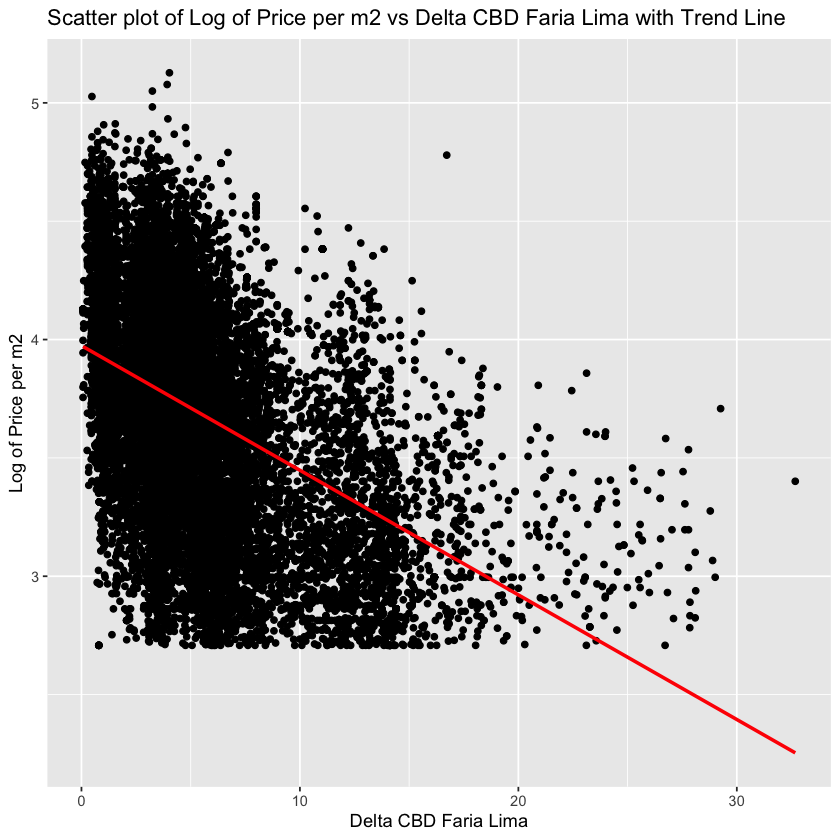

In [49]:
data_rent_wo_outliers$price_m2_log <- log(data_rent_wo_outliers$price_m2)
reg_log <- lm(price_m2_log ~ delta_cbd_farialima, data = data_rent_wo_outliers)
summary(reg_log)
# Create a scatter plot
# Create a scatter plot with a trend line
ggplot(data_rent_wo_outliers, aes(x = delta_cbd_farialima, y = price_m2_log)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(x = "Delta CBD Faria Lima", y = "Log of Price per m2", title = "Scatter plot of Log of Price per m2 vs Delta CBD Faria Lima with Trend Line")

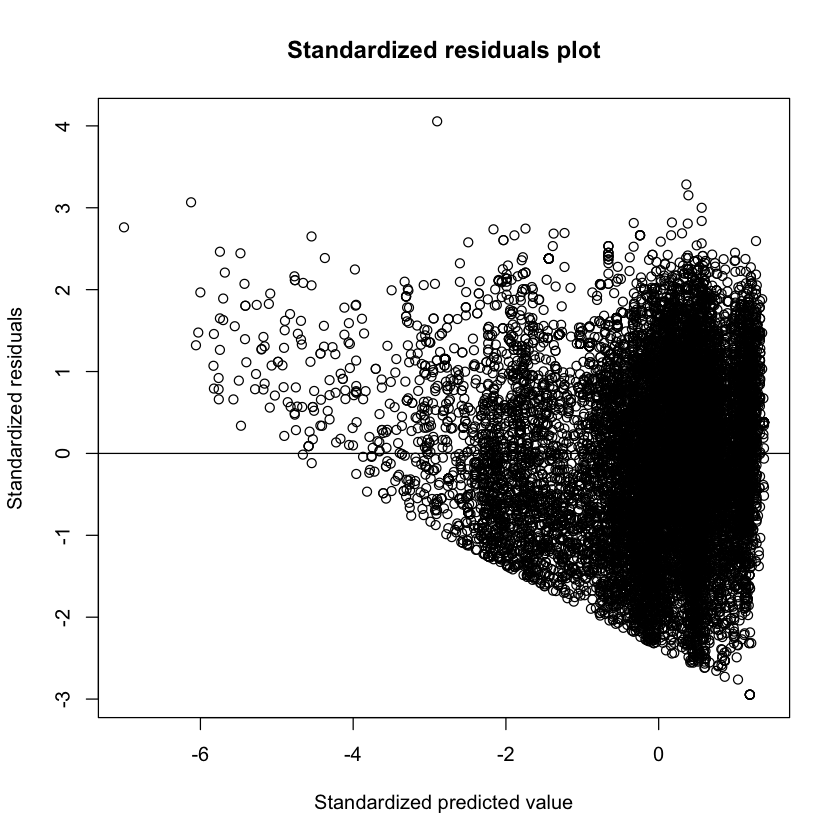

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.648993, Df = 1, p = 0.10362

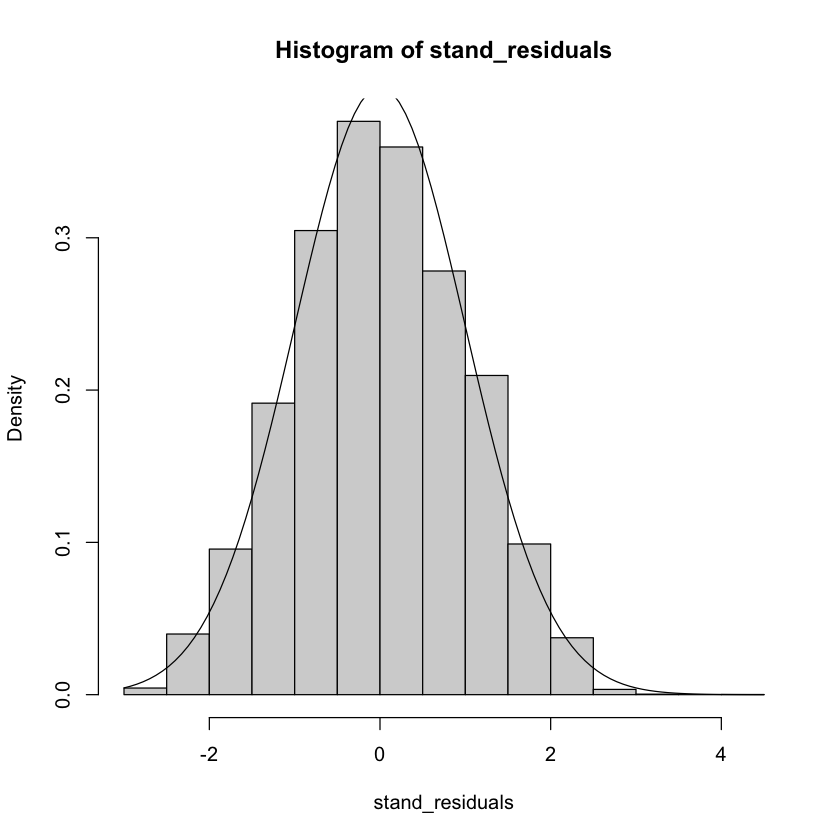

In [50]:
predicted<- predict(reg_log)
residuals <- resid(reg_log)
stand_predicted <- (predicted - mean(predicted)) / sd(predicted)
stand_residuals <- (residuals - mean(residuals)) / sd(residuals)

plot(stand_predicted, stand_residuals, main = "Standardized residuals plot", xlab = "Standardized predicted value", ylab = "Standardized residuals")
abline(0, 0)

hist(stand_residuals, freq = FALSE)
curve(dnorm, add = TRUE)

ncvTest(reg_log)